In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import resample

PATH = r"/media/justin/New Volume/plain_rec_contents/plain_rec_15min"

# File Loading

In [2]:
file_path = os.path.join(PATH,'Images')
frames = os.listdir(file_path)
func = lambda f : int(f.split('.')[0])
frames = sorted(frames, key=func)
frames = list(map(lambda x : os.path.join(file_path,x),frames))
frames

['/media/justin/New Volume/plain_rec_contents/plain_rec_15min/Images/92.921597396.png',
 '/media/justin/New Volume/plain_rec_contents/plain_rec_15min/Images/92.971597397.png',
 '/media/justin/New Volume/plain_rec_contents/plain_rec_15min/Images/92.071597384.png',
 '/media/justin/New Volume/plain_rec_contents/plain_rec_15min/Images/92.121597385.png',
 '/media/justin/New Volume/plain_rec_contents/plain_rec_15min/Images/92.171597385.png',
 '/media/justin/New Volume/plain_rec_contents/plain_rec_15min/Images/92.221597386.png',
 '/media/justin/New Volume/plain_rec_contents/plain_rec_15min/Images/92.271597387.png',
 '/media/justin/New Volume/plain_rec_contents/plain_rec_15min/Images/92.321597388.png',
 '/media/justin/New Volume/plain_rec_contents/plain_rec_15min/Images/92.371597388.png',
 '/media/justin/New Volume/plain_rec_contents/plain_rec_15min/Images/92.421597389.png',
 '/media/justin/New Volume/plain_rec_contents/plain_rec_15min/Images/92.47159739.png',
 '/media/justin/New Volume/plain_

In [3]:
class LiveGraphPlot:
    def __init__(self, graph_width=800, graph_height=400, num_points=100):
        self.graph_width = graph_width
        self.graph_height = graph_height
        self.num_points = num_points
        self.data = []
        self.data2 = []

    def plot_graph(self, value1,value2):
        self.data.append(value1)
        self.data = self.data[-self.num_points:]  # Keep only the latest data points

        self.data2.append(value2)
        self.data2 = self.data2[-self.num_points:]  # Keep only the latest data points
        
        plt.clf()  # Clear the figure
        plt.plot(range(len(self.data)), self.data)
        plt.plot(range(len(self.data2)), self.data2)
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.title('Live Graph')
        plt.grid(False)

        # Convert the plot to an image
        fig = plt.gcf()
        fig.canvas.draw()
        plot_img = np.array(fig.canvas.renderer.buffer_rgba())
            
        # Convert RGBA to RGB
        plot_img = cv2.cvtColor(plot_img, cv2.COLOR_RGBA2RGB)

        # Resize the plot image to fit the specified graph width and height
        plot_img = cv2.resize(plot_img, (self.graph_width, self.graph_height))

        return plot_img

In [4]:
# Open the file in write mode
file_path = os.path.join(PATH,'data.csv')
data = pd.read_csv(file_path)
data.drop(data.columns[0],axis=1,inplace=True)
data

,velocity,lin_acc_x,lin_acc_y,lin_acc_z,ang_acc_x,ang_acc_y,ang_acc_z,orient_x,orient_y,orient_z,throttle,steer,brake,pic_file_name
0,0.002549,-0.000061,-1.482325e-06,-0.050986,0.0,0.0,0.0,-0.000061,0.001100,-0.019974,0.85,0.000000,0.0,92.071597384.png
1,0.000320,-0.000006,8.497118e-07,0.044582,0.0,0.0,0.0,-0.000061,0.000888,-0.019974,0.85,0.000000,0.0,92.121597385.png
2,0.098370,1.967432,-6.872174e-04,0.018499,0.0,0.0,0.0,-0.000061,-0.002329,-0.019948,0.85,0.000000,0.0,92.171597385.png
3,0.258910,3.210628,-4.294041e-02,0.005604,0.0,0.0,0.0,-0.000275,-0.007984,-0.020123,0.85,0.000616,0.0,92.221597386.png
4,0.476104,4.344050,2.843620e-02,-0.000236,0.0,0.0,0.0,-0.000183,-0.017294,0.000702,0.85,0.000440,0.0,92.271597387.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8663,5.898657,8.968496,-4.654010e-03,-0.000059,0.0,0.0,0.0,-0.000061,0.039000,179.970016,0.00,0.000000,1.0,979.571610609.png
8664,4.557831,26.816587,-1.402281e-02,-0.124117,0.0,0.0,0.0,-0.000061,0.087556,179.969940,0.00,0.000000,1.0,979.621610609.png
8665,3.208875,26.979061,-6.151032e-03,0.074907,0.0,0.0,0.0,-0.000122,0.139438,179.969376,0.00,0.000616,1.0,979.67161061.png
8666,1.868220,26.813076,-2.071997e-02,0.036380,0.0,0.0,0.0,-0.000092,0.186765,179.969055,0.00,-0.000176,1.0,979.721610611.png


<Axes: >

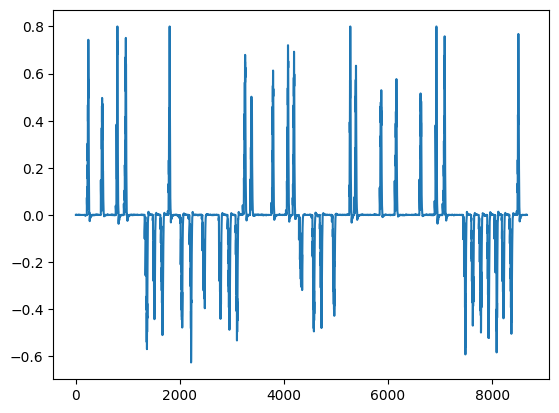

In [5]:
data.steer.plot()

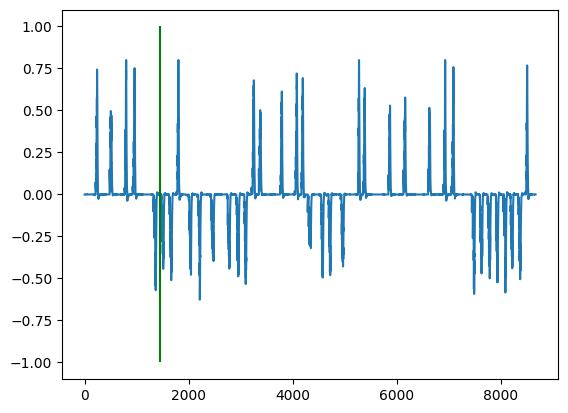

In [6]:
data['steer'].plot()
plt.vlines(1450,-1,1,colors='g')

# Dataloading

In [7]:
a = np.array(train_dataset.data[train_dataset.data.steer < -0.01].steer)
plt.plot(a)
plt.show()
print(a.shape)

NameError: name 'train_dataset' is not defined

In [ ]:
df_minority = train_dataset.data[train_dataset.data.steer < -0.01]
df_majority = train_dataset.data[train_dataset.data.steer > -0.01]
minority_count = len(df_minority)
minority_count

In [ ]:
df_minority_oversampled = resample(df_minority, n_samples=len(df_majority), replace=True, random_state=42)
print(df_minority_oversampled.shape)
df_minority_oversampled

In [ ]:
df_minority_oversampled.steer.plot()

In [ ]:
window_size = 20
rolling_std = np.std(np.lib.stride_tricks.sliding_window_view(a, window_size), axis=1)
rolling_mean = np.mean(np.lib.stride_tricks.sliding_window_view(a, window_size), axis=1)
plt.plot(rolling_std)
plt.plot(rolling_mean)
plt.show()

print(np.mean(rolling_mean))

In [11]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

# Define the desired data augmentation transformations including random erasing
transform = transforms.Compose([
    #transforms.RandomResizedCrop(size=(224, 224)),
    transforms.ToTensor(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.4), ratio=(0.3, 3.3)),
])


class CustomDataset(Dataset):
    def __init__(self,mode = 'train',over_sampling = True):
        #len_frames = len(frames)
        #n = int(0.8*len_frames)
        
        self.img_dir_path = os.path.join(PATH,'Images')
        if mode == 'train':
            self.data = data.iloc[:750]
            
            #Over-sampling
            if over_sampling == True:
                df_minority = self.data[self.data.steer < -0.01]
                df_majority = self.data[self.data.steer > -0.01]
                minority_count = len(df_minority)
                df_minority_oversampled = resample(df_minority, n_samples=len(df_majority), replace=True, random_state=42)
                self.data = pd.concat([df_minority_oversampled, df_majority])
                
        else:
            self.data = data.iloc[1450:]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        # Implement your logic to retrieve and preprocess the data
        sample = self.data.iloc[index]['pic_file_name']
        sample = os.path.join(self.img_dir_path,sample)
        img = cv2.imread(sample)
        #print(img.shape)
        #img = transform(img).numpy()
        img = cv2.resize(img, (200,88))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        
        velocity = self.data.iloc[index]['velocity']
        
        throttle = self.data.iloc[index]['throttle']
        steer = self.data.iloc[index]['steer']
        brake = self.data.iloc[index]['brake']
        
        # Return the sample as a tuple or dictionary
        return (img,velocity),(steer,throttle,brake)

# Create an instance of your custom dataset
train_dataset = CustomDataset('train')
val_dataset = CustomDataset('val')

# Create a data loader
batch_size = 16
dataloader = {'train' : DataLoader(train_dataset, batch_size=batch_size, shuffle=True),
              'val' : DataLoader(val_dataset, batch_size=batch_size, shuffle=True)}

In [12]:
for index,i in enumerate(dataloader['train']):
    print(i[0][0].shape,i[1][0].shape)
    if index == 0:
        break

torch.Size([16, 88, 200, 3]) torch.Size([16])


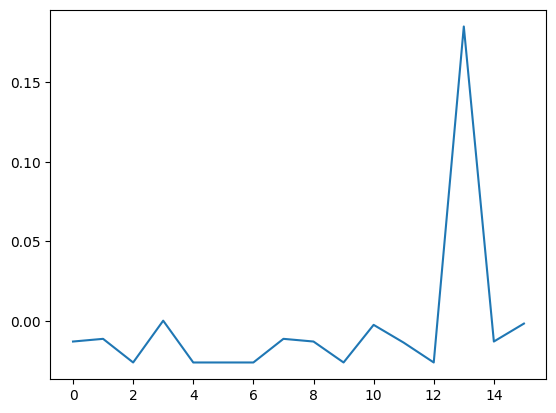

In [31]:
plt.plot(i[1][0])

for j in range(200):
    cv2.imshow("Frame",i[0][0][j].cpu().numpy().astype('uint8'))
        
    if cv2.waitKey(25) & 0xFF == ord('q'):
            break
        
cv2.destroyAllWindows()

# Model

In [24]:
# Model Number 2

from torch import nn
from tqdm.notebook import tqdm

class fc_block(nn.Module):
    def __init__(self,in_channel,out_channel,dropout,act = True):
        super(fc_block, self).__init__()
        self.fc = nn.Linear(in_channel, out_channel)
        self.bn = nn.BatchNorm1d(out_channel)
        self.dropout = nn.Dropout(p=dropout)
        self.relu = nn.ReLU()
        self.act = act

    def forward(self,x):
        #print(x.shape)
        x = self.fc(x)
        x = self.bn(x)
        x = self.dropout(x)
        if self.act == True:
            x = self.relu(x)
        return x

class cnn_block(nn.Module):
    def __init__(self,in_channel,out_channel,kernel_size,stride,dropout):
        super(cnn_block, self).__init__()
        #self.cnn = nn.Conv2d(in_channel,out_channel, kernel_size=kernel_size, stride=stride, padding=0)
        self.depthwise_conv = nn.Conv2d(in_channels=in_channel, out_channels=in_channel, kernel_size=kernel_size,stride = stride, groups=in_channel)
        self.pointwise_conv = nn.Conv2d(in_channels=in_channel, out_channels=out_channel, kernel_size=1)
        self.bn = nn.BatchNorm2d(out_channel)
        self.dropout = nn.Dropout(p=dropout)
        self.relu = nn.ReLU()

    def forward(self,x):
        #x = self.cnn(x)
        x = self.depthwise_conv(x)
        x = self.pointwise_conv(x)
        x = self.bn(x)
        x = self.dropout(x)
        x = self.relu(x)
        return x

class branch(nn.Module):
    def __init__(self,in_channel,out_channel,dropout):
      super(branch,self).__init__()
      self.fc1 = fc_block( 640, 256, 0.2)
      self.fc2 = fc_block( 256, 256, 0.2)
      self.fc3 = fc_block( 256, 3, 0.2,act = False)

    def forward(self,x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

class Lambda(nn.Module):
    def __init__(self, lambd):
        super(Lambda, self).__init__()
        self.lambd = lambd

    def forward(self, x):
        return self.lambd(x)

In [25]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()

        # Image processing configuration

        self.cnn_1 = cnn_block(3,32,5,2,0.5)
        self.cnn_2 = cnn_block(32,32,3,1,0.5)

        self.cnn_3 = cnn_block(32,64,3,2,0.5)
        self.cnn_4 = cnn_block(64,64,3,1,0.5)

        self.cnn_5 = cnn_block(64,128,3,2,0.5)
        self.cnn_6 = cnn_block(128,128,3,1,0.5)

        self.cnn_7 = cnn_block(128,256,3,1,0.5)
        self.cnn_8 = cnn_block(256,256,3,1,0.5)


        self.fc_img_1 = fc_block( 256*16*2, 512, 0.2)
        self.fc_img_2 = fc_block( 512, 512, 0.2)

        # Speed processing configuration
        self.fc_speed_1 = fc_block( 1, 128, 0.2)
        self.fc_speed_2 = fc_block( 128, 128, 0.2)

        # Branching
        self.fc_follow_lane_branch = branch(640,256,0.2)
        self.fc_left_turn_branch = branch(640,256,0.2)
        self.fc_right_turn_branch = branch(640,256,0.2)
        self.fc_straight_branch = branch(640,256,0.2)
        self.fc_default_branch = branch(640,256,0.2)

        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        #self.device = 'cpu'


    def forward(self, x_img, x_speed, commands):

        x_img = x_img/255 - 0.5
        # Image processing layers
        #print(x_img.shape)
        x_img = self.cnn_1(x_img)
        #print(x_img.shape)
        x_img = self.cnn_2(x_img)
        #print(x_img.shape)
        x_img = self.cnn_3(x_img)
        #print(x_img.shape)
        x_img = self.cnn_4(x_img)
        #print(x_img.shape)
        x_img = self.cnn_5(x_img)
        #print(x_img.shape)
        x_img = self.cnn_6(x_img)
        #print(x_img.shape)
        x_img = self.cnn_7(x_img)
        #print(x_img.shape)
        x_img = self.cnn_8(x_img)
        #print(x_img.shape)
        
        x_img = x_img.reshape(-1, 256*16*2)
        x_img = self.fc_img_1(x_img)
        x_img = self.fc_img_2(x_img)


        # Speed Processing Layers
        x_speed = self.fc_speed_1(x_speed)
        x_speed = self.fc_speed_2(x_speed)

        # Fusion 
        x_joint = torch.cat([x_img,x_speed],axis = 1)

        # Branching
        def branching(cmd):
            if torch.equal(cmd,torch.tensor(0).to(self.device)) and torch.equal(cmd,torch.tensor(2).to(self.device)):
                print("In Here at 0 !!!")
                return self.fc_follow_lane_branch(x_joint)
            elif torch.equal(cmd,torch.tensor(3).to(self.device)):
                print("In Here at 2 !!!")
                return self.fc_left_turn_branch(x_joint)
            elif torch.equal(cmd,torch.tensor(4).to(self.device)):
                print("In Here at 3 !!!")
                return self.fc_right_turn_branch(x_joint)
            elif torch.equal(cmd,torch.tensor(5).to(self.device)):
                return self.fc_straight_branch(x_joint)
            else:
                return self.fc_default_branch(x_joint) 

        branch_output = Lambda(branching)(commands)
        return branch_output

In [26]:
data

,velocity,lin_acc_x,lin_acc_y,lin_acc_z,ang_acc_x,ang_acc_y,ang_acc_z,orient_x,orient_y,orient_z,throttle,steer,brake,pic_file_name
0,0.002549,-0.000061,-1.482325e-06,-0.050986,0.0,0.0,0.0,-0.000061,0.001100,-0.019974,0.85,0.000000,0.0,92.071597384.png
1,0.000320,-0.000006,8.497118e-07,0.044582,0.0,0.0,0.0,-0.000061,0.000888,-0.019974,0.85,0.000000,0.0,92.121597385.png
2,0.098370,1.967432,-6.872174e-04,0.018499,0.0,0.0,0.0,-0.000061,-0.002329,-0.019948,0.85,0.000000,0.0,92.171597385.png
3,0.258910,3.210628,-4.294041e-02,0.005604,0.0,0.0,0.0,-0.000275,-0.007984,-0.020123,0.85,0.000616,0.0,92.221597386.png
4,0.476104,4.344050,2.843620e-02,-0.000236,0.0,0.0,0.0,-0.000183,-0.017294,0.000702,0.85,0.000440,0.0,92.271597387.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8663,5.898657,8.968496,-4.654010e-03,-0.000059,0.0,0.0,0.0,-0.000061,0.039000,179.970016,0.00,0.000000,1.0,979.571610609.png
8664,4.557831,26.816587,-1.402281e-02,-0.124117,0.0,0.0,0.0,-0.000061,0.087556,179.969940,0.00,0.000000,1.0,979.621610609.png
8665,3.208875,26.979061,-6.151032e-03,0.074907,0.0,0.0,0.0,-0.000122,0.139438,179.969376,0.00,0.000616,1.0,979.67161061.png
8666,1.868220,26.813076,-2.071997e-02,0.036380,0.0,0.0,0.0,-0.000092,0.186765,179.969055,0.00,-0.000176,1.0,979.721610611.png


# Training

In [27]:
# check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Train your model
model = Model().to(device)

In [28]:
# Define your loss function and optimizer
from livelossplot import PlotLosses

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
PATH = "model.pth"

liveloss = PlotLosses()

for epoch in tqdm(range(50),desc = 'Epochs : '):
    logs = {}
    
    for phase in ['train','val']:

        running_loss = 0.0
        for inputs,targets in tqdm(dataloader[phase],desc = phase + ' : '):

            inputs_img = inputs[0].permute(0,3,1,2).to(device)
            inputs_speed = inputs[1].unsqueeze(1).to(device).to(torch.float32)
            inputs_command = torch.tensor([0]).to(device)
            labels = torch.cat([i.unsqueeze(1) for i in targets],axis = 1).to(device).to(torch.float32)

            outputs = model(inputs_img,inputs_speed,inputs_command)

            if phase == 'train':
                optimizer.zero_grad()
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            running_loss += loss.item() * inputs_img.size(0)
            epoch_loss = running_loss / len(dataloader[phase].dataset)

            prefix = ''
            if phase == 'val':
                prefix = 'val_'

            logs[prefix + 'mse'] = np.sqrt(epoch_loss)

            # Save the model
            torch.save(model.state_dict(), PATH)

    liveloss.update(logs)
    liveloss.draw()


    print("Epoch {} loss: {}".format(epoch, epoch_loss))

Epochs :   0%|          | 0/50 [00:00<?, ?it/s]

train :   0%|          | 0/94 [00:00<?, ?it/s]

(600, 800, 3)
(600, 800, 3)
(600, 800, 3)
(600, 800, 3)
(600, 800, 3)
(600, 800, 3)
(600, 800, 3)
(600, 800, 3)
(600, 800, 3)
(600, 800, 3)
(600, 800, 3)
(600, 800, 3)
(600, 800, 3)
(600, 800, 3)
(600, 800, 3)
(600, 800, 3)


KeyboardInterrupt: 

In [130]:
# Create an instance of your custom dataset
train_dataset = CustomDataset(mode = 'train',over_sampling = False)
val_dataset = CustomDataset(mode = 'val',over_sampling = False)

dataloader = {'train' : DataLoader(train_dataset, batch_size=batch_size, shuffle=False),
              'val' : DataLoader(val_dataset, batch_size=batch_size, shuffle=False)}

in_data1 = []
in_data2 = []
out_data = []
for idx,(inputs,outputs) in enumerate(dataloader['val']):
    in_data1.append(inputs[0])
    in_data2.append(inputs[1])
    out_data.append(torch.cat([i.unsqueeze(1) for i in outputs],axis = 1))
    
in_data1 = torch.cat(in_data1,axis = 0).to(device).permute(0,3,1,2)
in_data2 = torch.cat(in_data2,axis = 0).to(device).unsqueeze(1).to(torch.float32)
out_data = torch.cat(out_data,axis = 0).to(device)

in_data1.shape,in_data2.shape,out_data.shape

(torch.Size([250, 3, 88, 200]), torch.Size([250, 1]), torch.Size([250, 3]))

In [131]:
pred_data = model(in_data1,in_data2,inputs_command)

out_data = out_data.detach().cpu().numpy()
pred_data = pred_data.detach().cpu().numpy()

In [132]:
def exponential_smoothing(arr, alpha = 0.2):
    smoothed = np.zeros_like(arr)
    smoothed[0] = arr[0]  # The first value remains the same

    for i in range(1, len(arr)):
        smoothed[i] = alpha * arr[i] + (1 - alpha) * smoothed[i - 1]

    return smoothed

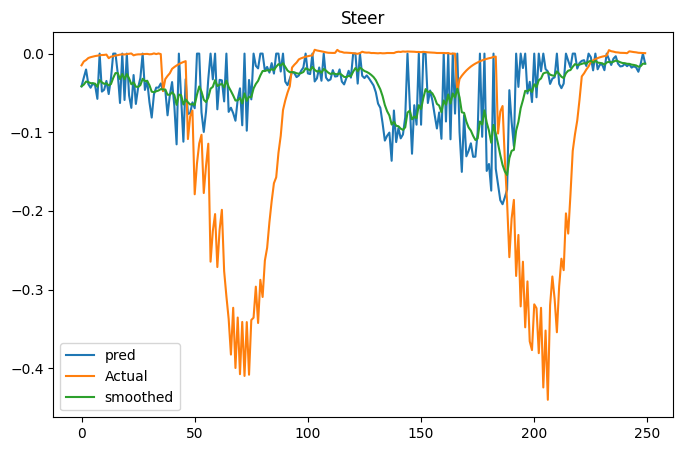

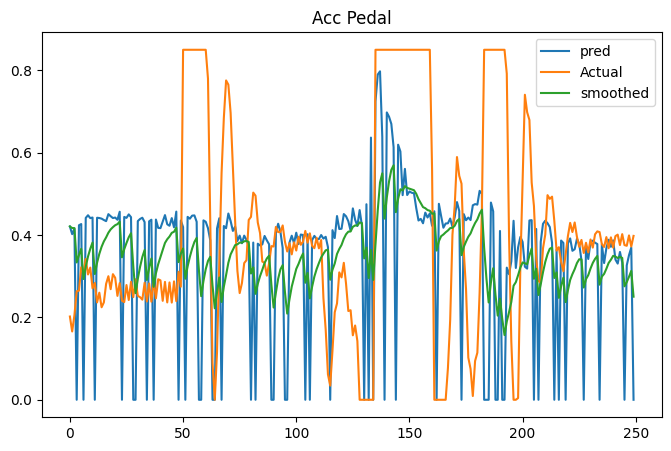

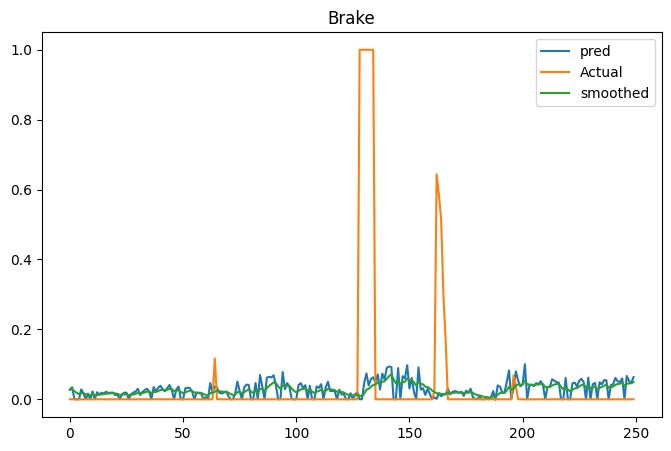

In [133]:
plt.figure(figsize = (8,5))
plt.plot(pred_data[:,0])
plt.plot(out_data[:,0])
plt.plot(exponential_smoothing(pred_data[:,0]))
plt.legend(["pred","Actual","smoothed"])
plt.title("Steer")
plt.show()

plt.figure(figsize = (8,5))
plt.plot(pred_data[:,1])
plt.plot(out_data[:,1])
plt.plot(exponential_smoothing(pred_data[:,1]))
plt.legend(["pred","Actual","smoothed"])
plt.title("Acc Pedal")
plt.show()

plt.figure(figsize = (8,5))
plt.plot(pred_data[:,2])
plt.plot(out_data[:,2])
plt.plot(exponential_smoothing(pred_data[:,2]))
plt.legend(["pred","Actual","smoothed"])
plt.title("Brake")
plt.show()